<a href="https://colab.research.google.com/github/gaurav1210/MAJOR-PROJECT/blob/master/(PROJECT_2)_FACE_DETECTION_USING_DETECTRON2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1. Checking the system **GPU driver**

In [0]:
!nvidia-smi

Sun May 17 09:41:11 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Step 2. Installing the **COCO datasets** and **pytorch** Framework in the environment

In [0]:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6 in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
     |████████████████████████████████| 276kB 3.5MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=086617f5d244dca28088f04abb4f3244a0b95555ce0d79bd9963bff807daf326
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-w0s0i4b9
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-w0s0i4b9
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-lin

## Step 3. Installing the **Detectron2 framework** in the environment

In [0]:
!pip install detectron2==0.1.2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.2MB 616kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post200513-cp36-none-any.whl size=40893 sha256=ead12e2a79ad83183ee7053fae3465f7aa533760f36bb8d9f8c3038249cc1756
  Stored in directory: /root/.cache/pip/wheels/a2/f6/77/551770c4b8cd75e9335cd0acf59c08d60a8684048b19da6702
Successfully built fvcore


## Step 4. Importing the necessary **Libraries** in the **working environment**

In [0]:
import torch, torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import glob
import os
import ntpath
import numpy as np
import cv2
import random
import itertools
import pandas as pd
from tqdm import tqdm
import urllib
import json
import PIL.Image as Image
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.structures import BoxMode
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Step 5. Importing the **Dataset** from the **Google drive**

In [0]:
!gdown --id 1K79wJgmPTWamqb04Op2GxW0SW9oxw8KS

Downloading...
From: https://drive.google.com/uc?id=1K79wJgmPTWamqb04Op2GxW0SW9oxw8KS
To: /content/face_detection.json
100% 274k/274k [00:00<00:00, 64.7MB/s]


## Step 6. Reading the **Dataset** using **Pandas** Dataframe and showing bydefault 5 records into the working environment

In [0]:
faces_df = pd.read_json('face_detection.json', lines=True)
faces_df.head(10)

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Face'], 'notes': '', 'points': [{...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Face'], 'notes': '', 'points': [{...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Face'], 'notes': '', 'points': [{...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Face'], 'notes': '', 'points': [{...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Face'], 'notes': '', 'points': [{...",NaN
5,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Face'], 'notes': '', 'points': [{...",NaN
6,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Face'], 'notes': '', 'points': [{...",NaN
7,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Face'], 'notes': '', 'points': [{...",NaN
8,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Face'], 'notes': '', 'points': [{...",NaN
9,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Face'], 'notes': '', 'points': [{...",NaN


## Step 7. Working on datasets or **processing** on dataset

In [0]:
os.makedirs("faces", exist_ok=True)

dataset = []

for index, row in tqdm(faces_df.iterrows(), total=faces_df.shape[0]):
    img = urllib.request.urlopen(row["content"])
    img = Image.open(img)
    img = img.convert('RGB')

    image_name = f'face_{index}.jpeg'

    img.save(f'faces/{image_name}', "JPEG")

    annotations = row['annotation']
    for an in annotations:

      data = {}

      width = an['imageWidth']
      height = an['imageHeight']
      points = an['points']

      data['file_name'] = image_name
      data['width'] = width
      data['height'] = height

      data["x_min"] = int(round(points[0]["x"] * width))
      data["y_min"] = int(round(points[0]["y"] * height))
      data["x_max"] = int(round(points[1]["x"] * width))
      data["y_max"] = int(round(points[1]["y"] * height))

      data['class_name'] = 'face'

      dataset.append(data)

100%|██████████| 409/409 [01:46<00:00,  3.82it/s]


## Step 8. **Putting** the dataset into the pandas dataframe for better understanding

In [0]:
df = pd.DataFrame(dataset)

## Step 9. **Printing** the value of **dataset with shape**

In [0]:
print(df.file_name.unique().shape[0], df.shape[0])

409 1132


## Step 10. **Save** the **dataset** into the **disk**

In [0]:
df.to_csv('annotations.csv', header=True, index=None)

## Step 11. **Exploring** the data

In [0]:
def annotate_image(annotations, resize=True):
  file_name = annotations.file_name.to_numpy()[0]
  img = cv2.cvtColor(cv2.imread(f'faces/{file_name}'), cv2.COLOR_BGR2RGB)

  for i, a in annotations.iterrows():
    cv2.rectangle(img, (a.x_min, a.y_min), (a.x_max, a.y_max), (0, 255, 0), 2)

  if not resize:
    return img

  return cv2.resize(img, (384, 384), interpolation = cv2.INTER_AREA)

## Step 12. **Showing the annotation images** in the working environment

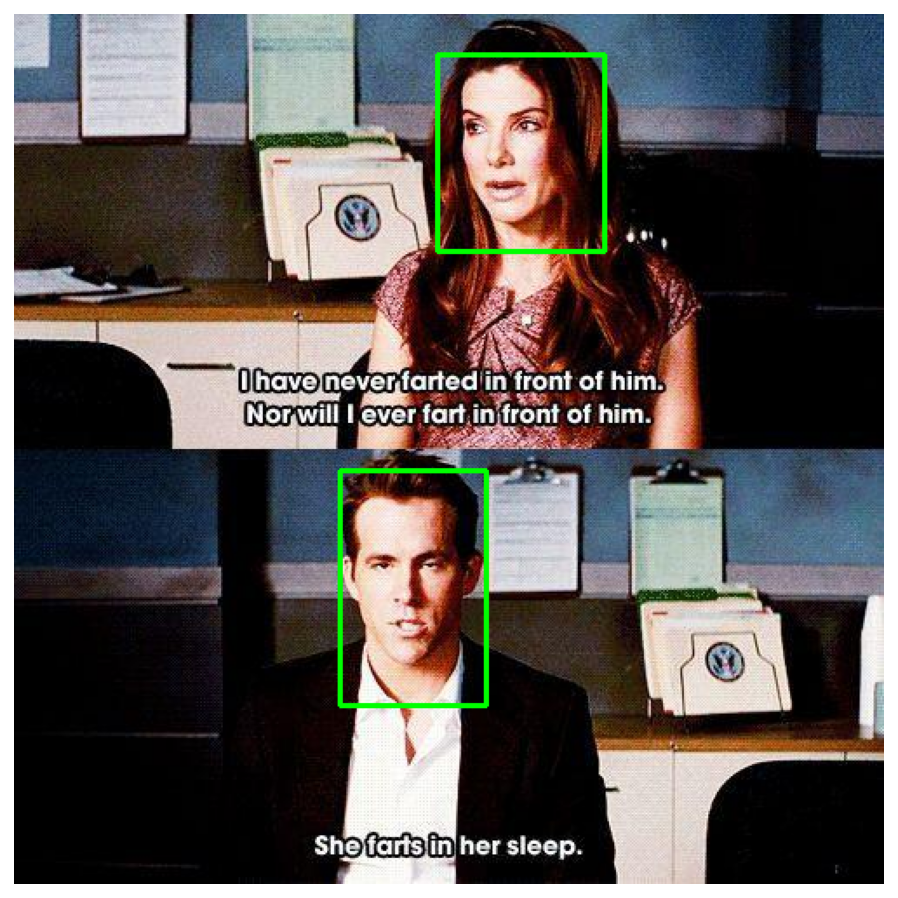

In [0]:
img_df = df[df.file_name == df.file_name.unique()[5]]
img = annotate_image(img_df, resize=False)

plt.imshow(img)
plt.axis('off');